In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:

Nx = 201
Ny = 201

x = np.linspace(0,0.2,Nx)
y = np.linspace(0,0.2,Nx)


deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltax


0.001

In [3]:
def Ti(x,y):
    return np.e**(x*y)

In [4]:
def InitT():

    T = np.zeros((Nx,Ny))

    #T[:,:] = Ti(x,y)
    T[0,:] = 10


    return T

In [5]:
T = InitT()
T

array([[10., 10., 10., ..., 10., 10., 10.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [6]:
def Relajacion(T,Nit = int(1e3),omega=0.5,tolerancia = 1e-3):

    itmax = 0


    for it in tqdm(range(Nit)):

        dmax = 0.

        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):

                tmp = (T[i,j+1]+T[i,j-1]+T[i-1,j]+T[i+1,j])/4-np.e**(-x[i]*y[j])*deltax**2/4

                # Matriz resta
                r = omega*(tmp - T[i,j])

                # Actualizo la matrix
                T[i,j] += r

                if np.abs(r) > dmax:
                    dmax = r

        #print(np.round(T,2))


        if np.abs(dmax) < tolerancia:

            print(it)
            itmax = it
            break

    return T,itmax



In [7]:
Tf1,_ = Relajacion(T)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [02:22<00:00,  7.01it/s]


In [8]:
Tf1

array([[ 1.00000000e+01,  1.00000000e+01,  1.00000000e+01, ...,
         1.00000000e+01,  1.00000000e+01,  1.00000000e+01],
       [ 0.00000000e+00,  4.99035150e+00,  6.95725470e+00, ...,
         6.95765312e+00,  4.99056021e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.00422971e+00,  4.96156232e+00, ...,
         4.96235501e+00,  3.00464496e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -3.69018514e-06, -6.68523558e-06, ...,
        -6.47897420e-06, -3.57421704e-06,  0.00000000e+00],
       [ 0.00000000e+00, -2.09467267e-06, -3.69060494e-06, ...,
        -3.57421704e-06, -2.02709653e-06,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

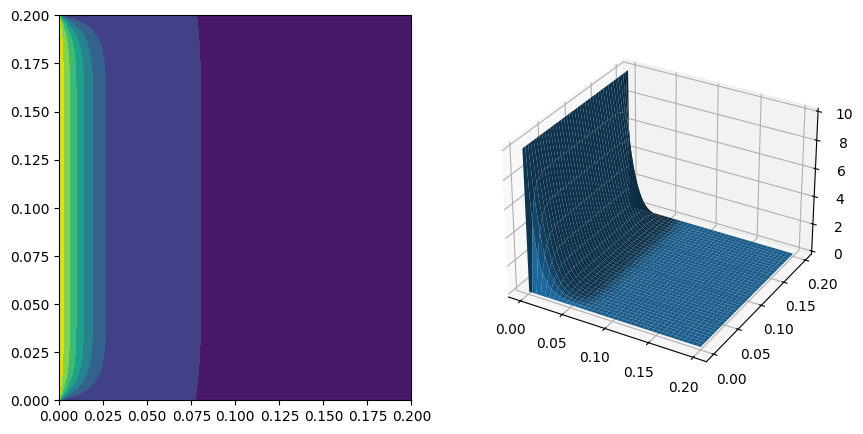

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,Tf1.T)

ax1.plot_surface(X,Y,Tf1.T)
plt.show()